In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

file_sqlite3='/Users/t-nakajima/Downloads/dockerhub (2).db'

with sql.connect(file_sqlite3) as conn:
  df_stock = pd.read_sql_query('SELECT * FROM dockerhub', conn)

df = pd.DataFrame()

df['date'] = pd.to_datetime(df_stock['date']).copy()
df['count'] = pd.to_numeric(df_stock['count']).copy()
df['name'] = df_stock['name'].copy()

df_kata = df[df['name'] == 'irixjp/katacoda']
df_lint = df[df['name'] == 'irixjp/lint-rules']

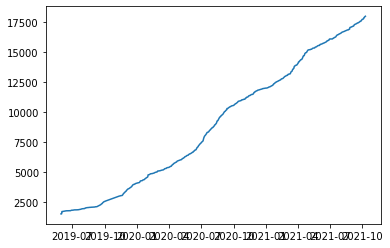

In [2]:
plt.plot(df_kata['date'], df_kata['count'])

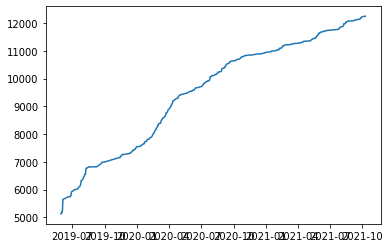

In [3]:
plt.plot(df_lint['date'], df_lint['count'])

In [4]:
df_kata_1 = pd.DataFrame()
df_kata_1['kata'] = df_kata.set_index('date')['count']
df_kata_1

,kata
date,
2019-05-29 23:42:04,1537
2019-05-30 09:42:45,1537
2019-05-31 12:00:09,1539
2019-06-01 12:58:34,1735
2019-06-02 12:22:16,1735
...,...
2021-10-06 03:30:04,17887
2021-10-07 03:30:05,17895
2021-10-08 03:30:04,17943


In [5]:
df_lint_1 = pd.DataFrame()
df_lint_1['lint'] = df_lint.set_index('date')['count']
df_lint_1

,lint
date,
2019-05-29 23:42:03,5125
2019-05-30 09:42:44,5125
2019-05-31 12:00:09,5130
2019-06-01 12:58:33,5196
2019-06-02 12:22:15,5196
...,...
2021-10-06 03:30:04,12236
2021-10-07 03:30:05,12242
2021-10-08 03:30:03,12247


In [6]:
df = pd.merge(df_kata_1, df_lint_1, right_index=True, left_index=True, how='outer').sort_index().copy()
df.index.name = None
df

,kata,lint
2019-05-29 23:42:03,NaN,5125.0
2019-05-29 23:42:04,1537.0,NaN
2019-05-30 09:42:44,NaN,5125.0
2019-05-30 09:42:45,1537.0,NaN
2019-05-31 12:00:09,1539.0,5130.0
...,...,...
2021-10-07 03:30:05,17895.0,12242.0
2021-10-08 03:30:03,NaN,12247.0
2021-10-08 03:30:04,17943.0,NaN
2021-10-09 03:30:04,17973.0,12247.0


<AxesSubplot:>

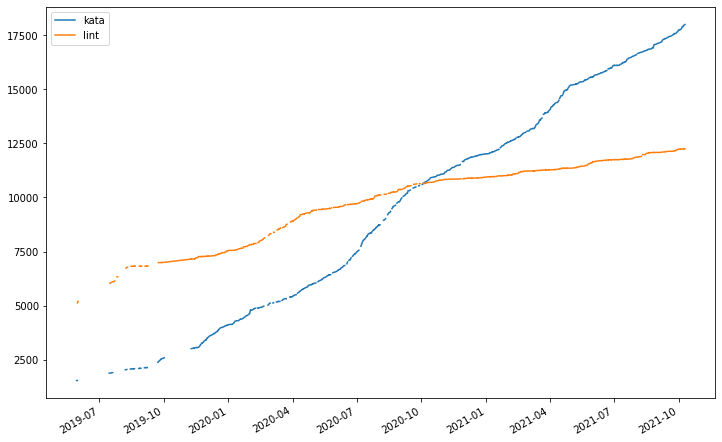

In [7]:
df.plot(figsize=(12, 8))

In [61]:
import datetime
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt

file = 'image_pull_count.pkl.gz'
targets = [["kata", "irixjp/katacoda"], ["lint", "irixjp/lint-rules"]]

def save_df_to_pkl(df, file):
    df.to_pickle(file, compression='gzip')

def load_from_pkl(file):
    df = pd.read_pickle(file, compression='gzip')
    return df.copy()

def get_pull_count(image):
    ret = rq.get('https://registry.hub.docker.com/v2/repositories/' + image + '/')
    json = ret.json()
    return pd.to_numeric(json['pull_count'])

def make_data(targets):
    result = []
    
    for key, image in targets:
        ret = get_pull_count(image)
        result.append(ret)

    return result

def main():
    df_orig = load_from_pkl(file)
    today_data = make_data(targets)
    dt_now = pd.to_datetime(datetime.datetime.now())

    df_orig.loc[dt_now] = today_data
    save_df_to_pkl(df_orig, file)
    
    df = df_orig['kata']
    plt.figure()
    df.plot(figsize=(16, 12))
    plt.savefig('kata.png')
    plt.close('all')

    df = df_orig['lint']
    plt.figure()
    df.plot(figsize=(16, 12))
    plt.savefig('lint.png')
    plt.close('all')

In [62]:
main()

In [53]:
dt_now = pd.to_datetime(datetime.datetime.now())
dt_now

Timestamp('2021-10-10 22:40:40.637317')

In [52]:
test = make_data(targets)
test

[18002, 12247]

In [51]:
df = load_from_pkl(file)
df

,kata,lint
2019-05-29 23:42:03,NaN,5125.0
2019-05-29 23:42:04,1537.0,NaN
2019-05-30 09:42:44,NaN,5125.0
2019-05-30 09:42:45,1537.0,NaN
2019-05-31 12:00:09,1539.0,5130.0
...,...,...
2021-10-07 03:30:05,17895.0,12242.0
2021-10-08 03:30:03,NaN,12247.0
2021-10-08 03:30:04,17943.0,NaN
2021-10-09 03:30:04,17973.0,12247.0


In [54]:
df.loc[dt_now] = test

<AxesSubplot:>

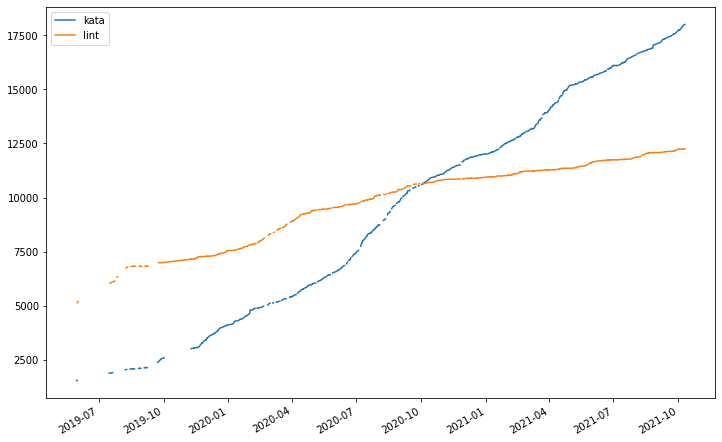

In [56]:
df.plot(figsize=(12, 8))

In [11]:
save_df_to_pkl(df, file)

In [12]:
load_from_pkl(file)

,kata,lint
2019-05-29 23:42:03,NaN,5125.0
2019-05-29 23:42:04,1537.0,NaN
2019-05-30 09:42:44,NaN,5125.0
2019-05-30 09:42:45,1537.0,NaN
2019-05-31 12:00:09,1539.0,5130.0
...,...,...
2021-10-07 03:30:05,17895.0,12242.0
2021-10-08 03:30:03,NaN,12247.0
2021-10-08 03:30:04,17943.0,NaN
2021-10-09 03:30:04,17973.0,12247.0


In [59]:
plt.figure()
df.plot(figsize=(16, 12))
plt.savefig('pandas_iris_line.png')
plt.close('all')

In [14]:
get_pull_count('irixjp/lint-rules')

NameError: name 'rq' is not defined